In [45]:
import glob
import json
import numpy as np
import pandas as pd
import lightgbm as lgb
import catboost as cb

import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline

import sys
sys.path.append("../")
import importlib
import mqe
importlib.reload(mqe)
importlib.reload(mqe.forecast)
importlib.reload(mqe.plot)

<module 'mqe.plot' from '../mqe/plot.py'>

In [2]:
trial_name = 'trial0'
model = 'lightgbm'
path_trial = '../result/gefcom2014-wind/'+trial_name

In [3]:
path = '../result/gefcom2014-wind/'+trial_name+'/dfs_eval_result/*'+'*.csv'
dfs_eval_result = mqe.forecast.load_dfs_trial(path, index_col=[0], header=[0,1,2])

In [4]:
params_path = path_trial+'/params_'+trial_name+'.json'
with open(params_path, 'r', encoding='utf-8') as file:
    params_json = json.loads(file.read())

models_path = path_trial+'/models/'
trial = mqe.forecast.Trial(params_json)
models = trial.load_models(models_path)

100%|██████████| 10/10 [00:08<00:00,  1.12it/s]


### Plot learning curves

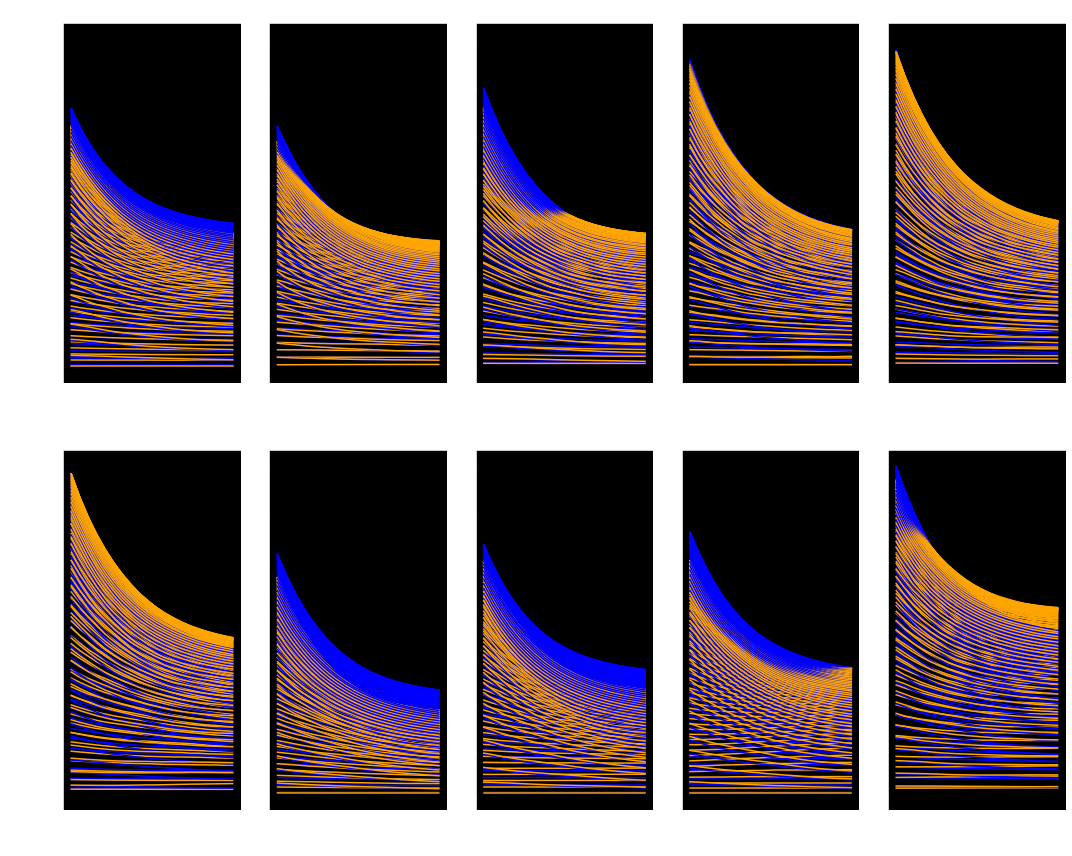

In [5]:
mqe.plot.plot_learning_curve(dfs_eval_result[0])

### Plot feature importance

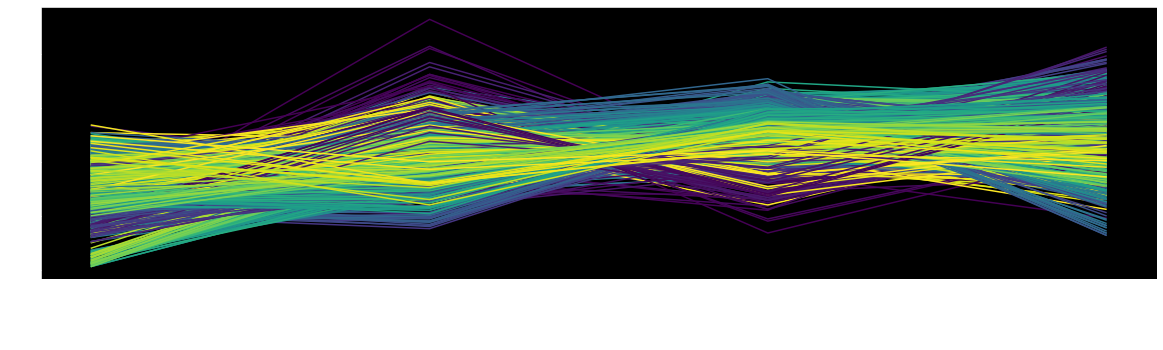

In [46]:
mqe.plot.plot_feature_importance(models[0], importance_type='gain')